In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.kmedoids import kmedoids
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Plot station
df = pd.read_csv('valence_arousal_dataset.csv')

In [3]:
df

,id,genre,track_name,artist_name,valence,energy
0,2CjMm3TDd9BS8xAcvbe6yY,acoustic,Let Her Go (feat. Hannah Trigwell),Boyce Avenue,0.307,0.3330
1,6bp1twiUg81a04GVGXHIsc,acoustic,Beach Baby,Bon Iver,0.111,0.0774
2,2r07lezrHUPEuhhBYW9JnC,acoustic,World Spins Madly On,The Shirelles,0.337,0.3610
3,51jy98I9q9Nk1xyA0W4ZBg,acoustic,"If You've Gotta Go, Go Now - Bonus Track",Various Artists,0.325,0.2170
4,574GJ55EBM79W6n2V5bL5z,acoustic,Slow It Down,The Lumineers,0.108,0.0640
...,...,...,...,...,...,...
11139,4AdEId7iTSaADarHjqIXvT,world-music,Oualahila Ar Tesninam,Various Artists,0.752,0.6980
11140,79lLkqFf3SWvmWVMmznKF9,world-music,Ausencia,Cesária Evora,0.427,0.1320
11141,4M6FuBh0zCSLFgoJ2SAWuw,world-music,Jama ko,Bassekou Kouyate,0.904,0.6650
11142,0V0CNmEzYPJRKeabBej6fu,world-music,"Free (Sina Mali, Sina Deni)",Various Artists,0.731,0.6540


[Text(0.5, 1.0, 'Energy vs Valence of All songs')]

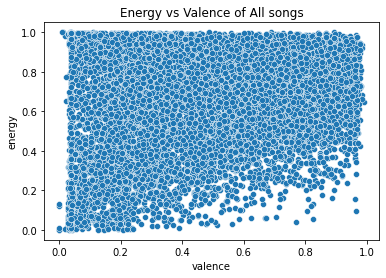

In [4]:
sns.scatterplot(x='valence', y='energy', data = df).set(title='Energy vs Valence of All songs')

/Users/salimwid/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/salimwid/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


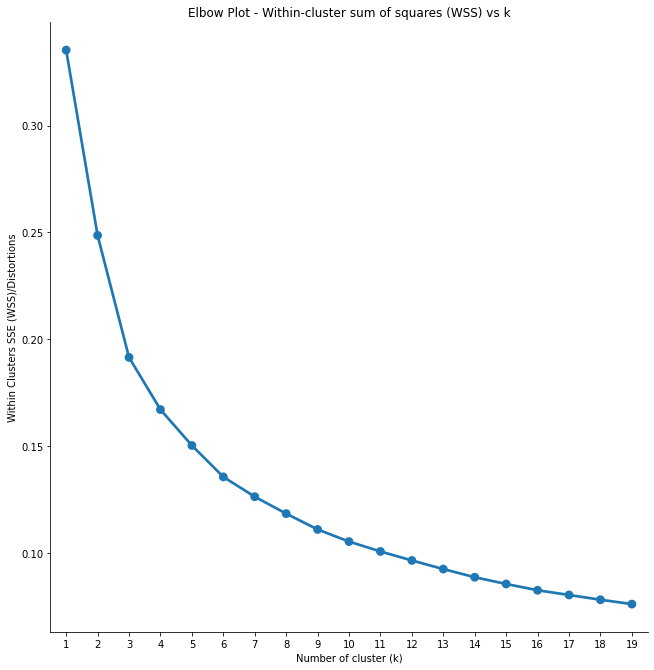

In [5]:
distortions = []
num_clusters = range(1, 20)

for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['valence', 'energy']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
elbow = sns.factorplot(x='num_clusters', y='distortions',data = elbow_plot, size=9).set(title='Elbow Plot - Within-cluster sum of squares (WSS) vs k', xlabel='Number of cluster (k)', ylabel='Within Clusters SSE (WSS)/Distortions')

In [16]:
# Generate cluster centers
cluster_centers, distortion = kmeans(df[['valence','energy']], 6)

# Assign cluster labels
df['k-means_moods'], distortion_list = vq(df[['valence','energy']], cluster_centers)

In [14]:
len(distortion_list)

11144

In [7]:
cluster_centers

array([[0.19169744, 0.2115369 ],
       [0.70005179, 0.47321498],
       [0.30270283, 0.53929592],
       [0.53317926, 0.83423726],
       [0.21479438, 0.88690868],
       [0.83505638, 0.81496547]])

In [8]:
mood_centroids = {'depressed':[0.19066008, 0.21390282],'misery':[0.29176613, 0.55255357], 'contentment': [0.67930098, 0.46349509], 'distressed':[0.21726171, 0.89302689], 'excitement':[0.83923924, 0.80557057], 'energetic':[0.53893319, 0.83543712]}

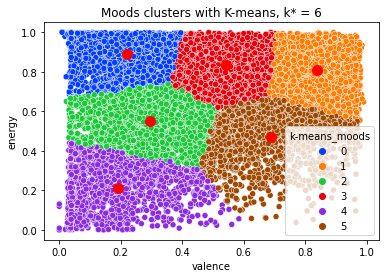

In [17]:
# Plot clusters
sns.scatterplot(x='valence', y='energy', hue='k-means_moods', palette='bright', data = df).set(title="Moods clusters with K-means, k* = 6")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='o', s = 100)
#plt.legend(title="Moods", loc=4, fontsize='small', labels=['0 - Depressed', '1 - Energetic', '2 - Misery', '3 - Excitement', '4 - Distressed', '5 - Contentment'])
plt.show()

In [ ]:
# Create instance of K-Medians algorithm.
K = 6
df_position = df[['valence', 'energy']]
initial_medians = [[0.19066008, 0.21390282], [0.29176613, 0.55255357], [0.67930098, 0.46349509], [0.21726171, 0.89302689], [0.83923924, 0.80557057], [0.53893319, 0.83543712]]
kmedians_instance = kmedians(df_position.values.tolist(),initial_medians)

In [ ]:
# Run cluster analysis and obtain results.
kmedians_instance.process()
cluster_instances = kmedians_instance.get_clusters() # index of data points in each cluster
centers = np.array(kmedians_instance.get_medians())

In [ ]:
clusters=np.zeros(len(df_position.index)) # initialize the membership of each point
for k in range(K):
    clusters[cluster_instances[k]]=k # label cluster membership for each point
    
sns.scatterplot(x=df['valence'], y=df['energy'], hue=clusters, palette='bright').set(title="Mood clusters with K-Medians, k* = 6")
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', s=100)
plt.show()

In [ ]:
# Set random initial medoids.
initial_medoids = [1, 50, 75, 90, 2, 45]
df_valence_energy = df[['valence', 'energy']]

# Create instance of K-Medoids algorithm.
kmedoids_instance = kmedoids(df_valence_energy.values, initial_medoids)
kmedoids_instance.process()

# Run cluster analysis and obtain results.
cluster_instances = kmedoids_instance.get_clusters() # index of data points in each cluster
center_index = kmedoids_instance.get_medoids()
centers=df_position.values[center_index,:]

clusters=np.zeros(len(df_position.index)) # initialize the membership of each point
for k in range(K):
    clusters[cluster_instances[k]]=k # label cluster membership for each point

sns.scatterplot(x=df['valence'], y=df['energy'], hue=clusters, palette='bright').set(title="Mood clusters with K-Medoids, k* = 10")
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='o', s=100);
plt.show()

In [ ]:
def distance(mood1, mood2):
    mean_valence = np.average([mood_centroids[mood1][0], mood_centroids[mood2][0]])
    mean_energy = np.average([mood_centroids[mood1][1], mood_centroids[mood2][1]])
    
    selected_moods = df.loc[df['k-means_moods_label'].isin([mood1, mood2])]
    selected_moods['euclidian_distance'] = ((selected_moods['valence'] - mean_valence)**2 + (selected_moods['energy'] - mean_energy)**2)**(1/2)
    
    #Select 1 song from 10 songs that have closest Euclidian Distance
    selected_track = selected_moods.sort_values('euclidian_distance').iloc[0:10]['track_name'].sample(n=1)
    
    return selected_track

In [ ]:
distance('excitement', 'energetic')

In [ ]:
mood_centroids

In [ ]:
moods = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprised']
mood_df = pd.DataFrame()


for main in moods:
    mood_df['main_mood'] = main
    for secondary in moods:
        mood_df['secondary_mood'] = secondary
    

In [ ]:
data = [['Angry', 'none', 'Distressed', 'Energetic', 'Contentment', 'none'], 
        ['Disgust', 'none', 'Distressed', 'none', 'Contentment', 'none'],
        ['Fear', 'none', 'Distressed', 'Misery', 'Contentment', 'Excitement'],
        ['Happy', 'none', 'Excitement', 'none', 'Excitement', 'none'],
        ['Sad', 'none', 'Depressed', 'none', 'Contentment', 'Excitement'],
        ['Surprised', 'Energetic', 'none', 'Misery', 'Contentment', 'none'],
        ['Neutral','Energetic','Contentment',]
       ]




In [ ]:
mood_df = pd.DataFrame(data = data, columns=['main_mood', 'secondary_mood', 'same_cluster1', 'same_cluster2', 'different_cluster1', 'different_cluster2'])

In [ ]:
mood_df

In [23]:
df.loc[df['k-means_moods'] == 0, 'moods_label'] = 'Distressed'
df.loc[df['k-means_moods'] == 1, 'moods_label'] = 'Excitement'
df.loc[df['k-means_moods'] == 2, 'moods_label'] = 'Misery'
df.loc[df['k-means_moods'] == 3, 'moods_label'] = 'Energetic'
df.loc[df['k-means_moods'] == 4, 'moods_label'] = 'Depressed'
df.loc[df['k-means_moods'] == 5, 'moods_label'] = 'Contentment'

In [24]:
df.to_csv('valence_arousal_dataset_labeled.csv')

In [22]:
df

,id,genre,track_name,artist_name,valence,energy,k-means_moods,moods_label
0,2CjMm3TDd9BS8xAcvbe6yY,acoustic,Let Her Go (feat. Hannah Trigwell),Boyce Avenue,0.307,0.3330,4,depressed
1,6bp1twiUg81a04GVGXHIsc,acoustic,Beach Baby,Bon Iver,0.111,0.0774,4,depressed
2,2r07lezrHUPEuhhBYW9JnC,acoustic,World Spins Madly On,The Shirelles,0.337,0.3610,2,misery
3,51jy98I9q9Nk1xyA0W4ZBg,acoustic,"If You've Gotta Go, Go Now - Bonus Track",Various Artists,0.325,0.2170,4,depressed
4,574GJ55EBM79W6n2V5bL5z,acoustic,Slow It Down,The Lumineers,0.108,0.0640,4,depressed
...,...,...,...,...,...,...,...,...
11139,4AdEId7iTSaADarHjqIXvT,world-music,Oualahila Ar Tesninam,Various Artists,0.752,0.6980,1,excitement
11140,79lLkqFf3SWvmWVMmznKF9,world-music,Ausencia,Cesária Evora,0.427,0.1320,4,depressed
11141,4M6FuBh0zCSLFgoJ2SAWuw,world-music,Jama ko,Bassekou Kouyate,0.904,0.6650,1,excitement
11142,0V0CNmEzYPJRKeabBej6fu,world-music,"Free (Sina Mali, Sina Deni)",Various Artists,0.731,0.6540,5,contentment
